# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import graphviz


# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Обычно перед обучением решающего не требуется совершать преобразования над признакми, поскольку дерево в силу простоты своей работы, но при этом многоуровневости само способно учитывать нелинейные зависимости и взаимодействия между признаками. В частности, ответим подробнее на предложенные вопросы.

1. Монотонные функции от одного признака: 

    Применение монотонных преобразований не имеет большого смысла, т.к при обучении дерево само может определить оптимальные параметры разбиения для конкретного признака, или можно подобрать хорошие гиперпараметры через GridSearchCV, то есть это не влияет на сложность обучения

2. Немонотонные функции от одного признака: 

    В этом случае сложность и время обучения дерева может значительно усложниться, так что в общем случае большого смысла применять такие преобразования нет, поскольку дерево само может учесть нелинейные зависимости в данных. Однако если мы предполагаем заранее какую-то явную зависимость от немонотонной функции над признаком, например от периодической (в частности зависимость силы от проекции на ось, то есть синуса угла в диапазоне $\alpha \in[0;2\pi]$) , то по сравнению с обучением по изменению угла, наше дерево сильно упростится. Таким образом в ряде случаев это имеет смысл.

3. Линейные функции от нескольких признаков:

    Решающие деревья могут автоматически выявлять нелинейные зависимости между признаками, поэтому в применении линейных преобразований нескольких признаков необходимости нет

4. Нелинейные функции от нескольких признаков:

    Применение нелинейных функций от нескольких признаков также может усложнить структуру дерева, решающие деревья уже способны выявлять нелинейные зависимости признаков без преобразований. Однако можно придумать ситуацию, аналогичною п.2 но в многомерном случае, где, предполагая явно нелинейную зависимость между признаками, можно упростить решающее дерево.

5. Стандартизация признаков: 

    В отличие от обучения моделей регрессии, где мы использовали `StandartScaler()` в случае решающего дерева в этом нет необходимость, т.к. оно само способно подбирать оптимальные границы разбиения признаков и, как следствие не чувствительны к стандартизации.

6. Преобразования категориальных признаков:

    В принципе, решающие деревья способны напрямую раобтать с категориальными признаками и обычно необходимостей в преобразованиях типа `OneHotEncoder()` нет необходимости. Однако можно придумать ситуацию со множеством категориальных признаков, которые к примеру линейно зависимы, но это не отражается явно в их изначальном виде. То есть иногда это может быть полезно.
    
Таким образом, перед обучением решающего дерева обычно нет необходимости в проведении сложных преобразований над признаками, так как дерево само способно учитывать различные типы зависимостей в данных, чтобы избежать переобучения и не усложнять себе инетрпретацию полученных результатов.  

Хотя иногда возможны ситуации, когда признак лучше преобразовать, например если мы заранее имее какое-то предположеение о том, что признаки и таргет зависят нелинейно.

## Задача 2

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



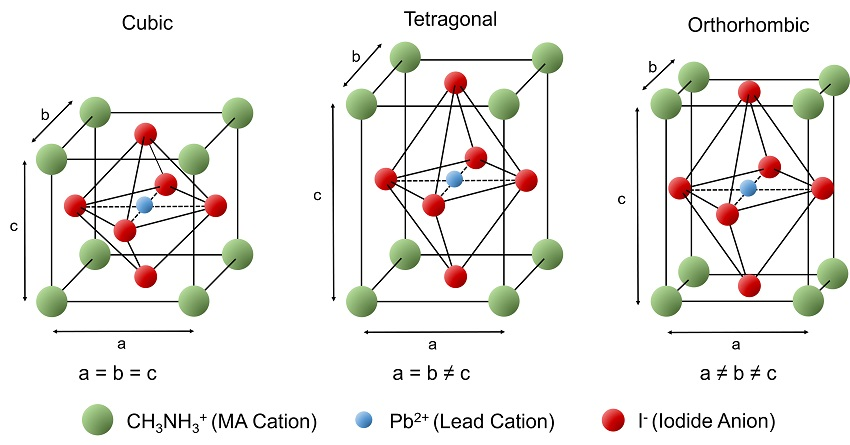


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [ ]:
data = pd.read_csv("/content/Crystal_structure.csv")

Сделаем предобработку данных.

In [ ]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [4]:
heart = pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [6]:
X = heart.drop('target', axis=1)
y = heart['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [8]:
y_train.shape

(227,)

Обучите модель решающего дерева.

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Сделайте предсказание для тестовой выборки.

In [10]:
y_pred=clf.predict(X_test)
print('test accuracy:', accuracy_score(y_test, y_pred))

test accuracy: 0.8026315789473685


In [11]:
y_pred.shape

(76,)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [12]:
bern_arr=np.array(sum([y_test[:] == y_pred[:]]))
bern_arr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

Как мы уже обсуждали ранее, для распределения Бернулли $Bern(\theta)$ матожидание $\mathbb E X= \theta$

Воспользуемся оценкой $\widehat{\theta} = \overline{X}$

Оценка для $\widehat{\sigma^2} = \overline{X}(1-\overline{X})$

Тогда доверительный интервал уровня доверия $\alpha = 0.95$ будет выглядеть как:
$$
\theta\ \in\ \left(\overline{X} \pm \frac{z_{(\alpha+1)/2}}{\sqrt{n}} \widehat{\sigma} \right) 
$$

In [13]:
est_theta=np.cumsum(bern_arr)/np.arange(1,77)
z_a=sps.norm.ppf(0.975)
n = np.sqrt(np.arange(1,77))
est_sigm=np.sqrt(est_theta*(1-est_theta))

left = est_theta - z_a*est_sigm/n
right = est_theta + z_a*est_sigm/n

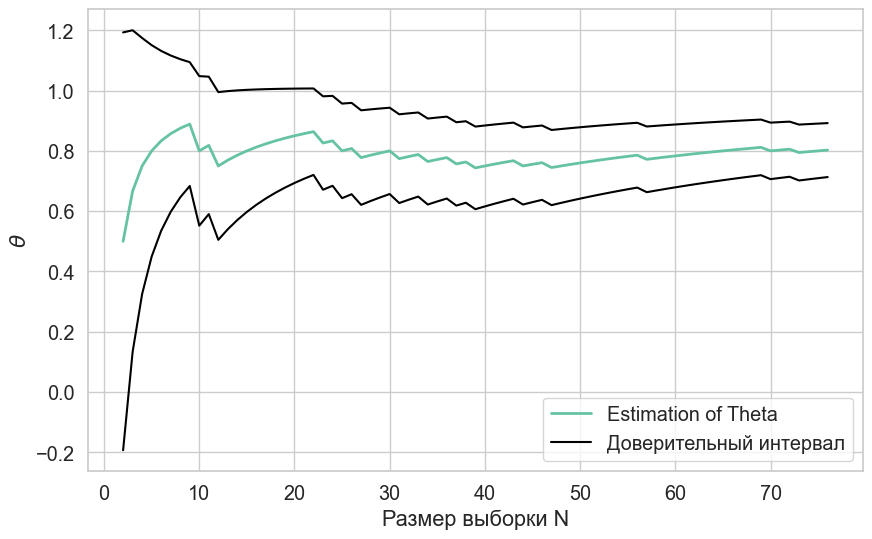

In [14]:
plt.figure(figsize=(10,6))

plt.plot((n**2)[1:], est_theta[1:], label='Estimation of Theta', lw=2)
plt.plot((n**2)[1:], left[1:], color='black', label='Доверительный интервал')
plt.plot((n**2)[1:], right[1:], color='black')
plt.xlabel('Размер выборки N')
plt.ylabel(r'$\theta$')
plt.legend(loc='lower right')

Построенный доверительный интервал в конце графика:

In [15]:
Interv=(np.round(left[75],4), np.round(right[75],4))
print(f' Доверительный интервал: {Interv}\n Среднее значение: {est_theta[75]:.4f} ')

 Доверительный интервал: (0.7131, 0.8921)
 Среднее значение: 0.8026 


Видно, что значение оценки $\widehat{\theta}$ в точности совпадает с посчитанным ранее `accuracy` для предсказания нашего дерева

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [16]:
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предсказание для тестовой выборки:

In [17]:
y_pred=rand_for.predict(X_test)
print('test accuracy:', accuracy_score(y_pred, y_test))

test accuracy: 0.8157894736842105


Видно, что по сравнению с предыдущей моделью значение `accuracy` выросло примерно на 0.014, что показывает более хороший результат предсказаний случайного леса

In [18]:
bern_arr2=np.array(sum([y_test[:] == y_pred[:]]))
bern_arr2.mean()

0.8157894736842105

Построим ДИ аналогично предыдущему пункту:

In [19]:
est_theta=np.cumsum(bern_arr2)/np.arange(1,77)
alpha=0.95
z_a=sps.norm.ppf((alpha+1)/2)
n = np.sqrt(np.arange(1,77))
est_sigm=np.sqrt(est_theta*(1-est_theta))

left = est_theta - z_a*est_sigm/n
right = est_theta + z_a*est_sigm/n

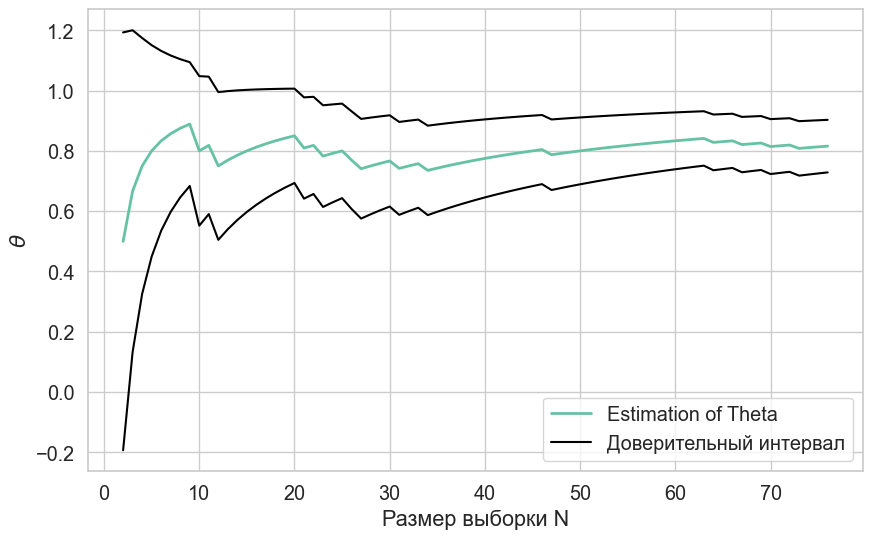

In [20]:
plt.figure(figsize=(10,6))

plt.plot((n**2)[1:], est_theta[1:], label='Estimation of Theta', lw=2)
plt.plot((n**2)[1:], left[1:], color='black', label='Доверительный интервал')
plt.plot((n**2)[1:], right[1:], color='black')
plt.xlabel('Размер выборки N')
plt.ylabel(r'$\theta$')
plt.legend(loc='lower right')

Принципиальных качественных отличий, по сравнения с деревьями нет, разница только в числах:

In [21]:
Interv=(np.round(left[75],4), np.round(right[75],4))
print(f' Доверительный интервал: {Interv}\n Среднее значение: {est_theta[75]:.4f} ')

 Доверительный интервал: (0.7286, 0.9029)
 Среднее значение: 0.8158 


**Выводы:** 

Видно, что случайный лес сделал больше верных предсказаний, о чём говорит значение `accuracy`, в данном случае совпадающее с оценкой $\widehat{\theta}$ для выборки из распределения Бернулли, то есть случайный лес является лучшей, чем решающее дерево моделью. Также доверительный интервал, полученный для случайного дерева оказался уже, чем для дерева. То есть вероятность верного предсказания оказалась более высокой, чем в первом случае, что сказано ранее. Также это говорит о меньшей дисперсии в случае случайного леса.


Попробуем чуть-чуть улучшить качество предсказаний моделями, руководствуясь жизненным опытом. Предположение заключается в том, что сердечные заболевания слабее связаны с **полом пациента**, чем со всеми остальными признаками

Уберём пол из признаков и посчитаем `accuracy` для **случайного леса**:

In [22]:
X = heart.drop(['target', 'sex'], axis=1)
y = heart['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [24]:
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предксказание для тестовой выборки:

In [25]:
y_pred=rand_for.predict(X_test)
print('test accuracy:', accuracy_score(y_pred, y_test))

test accuracy: 0.8421052631578947


Построим ДИ:

In [26]:
bern_arr3=np.array(sum([y_test[:] == y_pred[:]]))
bern_arr3.mean()

0.8421052631578947

In [27]:
est_theta=np.cumsum(bern_arr3)/np.arange(1,77)
alpha=0.95
z_a=sps.norm.ppf((1+alpha)/2)
n = np.sqrt(np.arange(1,77))
est_sigm=np.sqrt(est_theta*(1-est_theta))

left = est_theta - z_a*est_sigm/n
right = est_theta + z_a*est_sigm/n

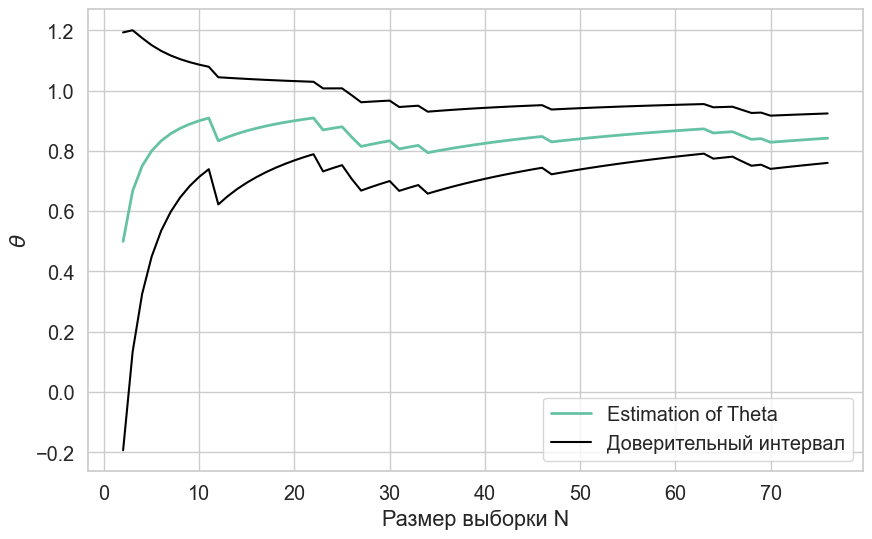

In [28]:
plt.figure(figsize=(10,6))

plt.plot((n**2)[1:], est_theta[1:], label='Estimation of Theta', lw=2)
plt.plot((n**2)[1:], left[1:], color='black', label='Доверительный интервал')
plt.plot((n**2)[1:], right[1:], color='black')
plt.xlabel('Размер выборки N')
plt.ylabel(r'$\theta$')
plt.legend(loc='lower right')

Снова не видим принципиальных разлиций с предыдущими случаями, разница только в значении оценки $\widehat{\theta}$ и ширине доверительного интервала.

Доверительный инетрвал:

In [31]:
Interv=(np.round(left[75],4), np.round(right[75],4))
print(f' Доверительный интервал: {Interv}\n Среднее значение: {est_theta[75]:.4f} ')

 Доверительный интервал: (0.7601, 0.9241)
 Среднее значение: 0.8421 


**Вывод 2:**

Частота встречи сердечных заболеваний у пациентов менее кореллирует с полом, чем с остальными представленными признаками и исключение данного признака из рассмотрения улучшает качество предсказаний для случайного леса: `accuracy`=0.84.

Доверительный интервал при этом также сужается, что о болшей вероятности успешного предсказания и меньшей дисперсии. То есть выкидывая признак `sex` можно получить лучшие результаты

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных НАСА</a>, он включает в себя аэродинамические профили NACA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача конечно имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования лесов для быстрых и довольно точных численных оценок.



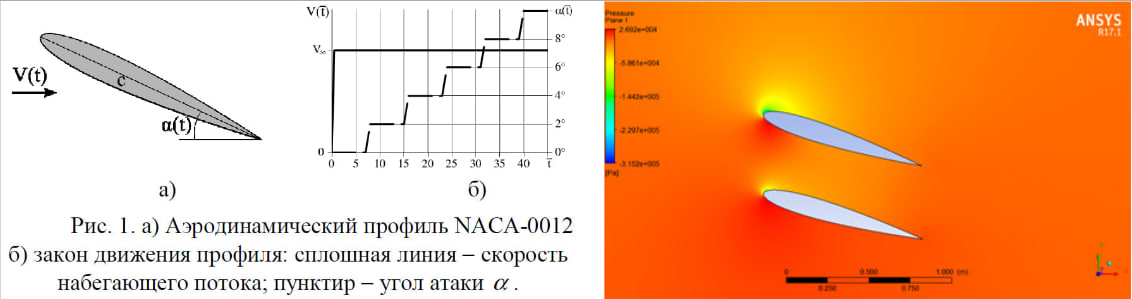

In [ ]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("/content/airfoil_self_noise.dat", sep='\t', names=column_names)

In [ ]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.drop('target',axis=1)
y = df[['target']]

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

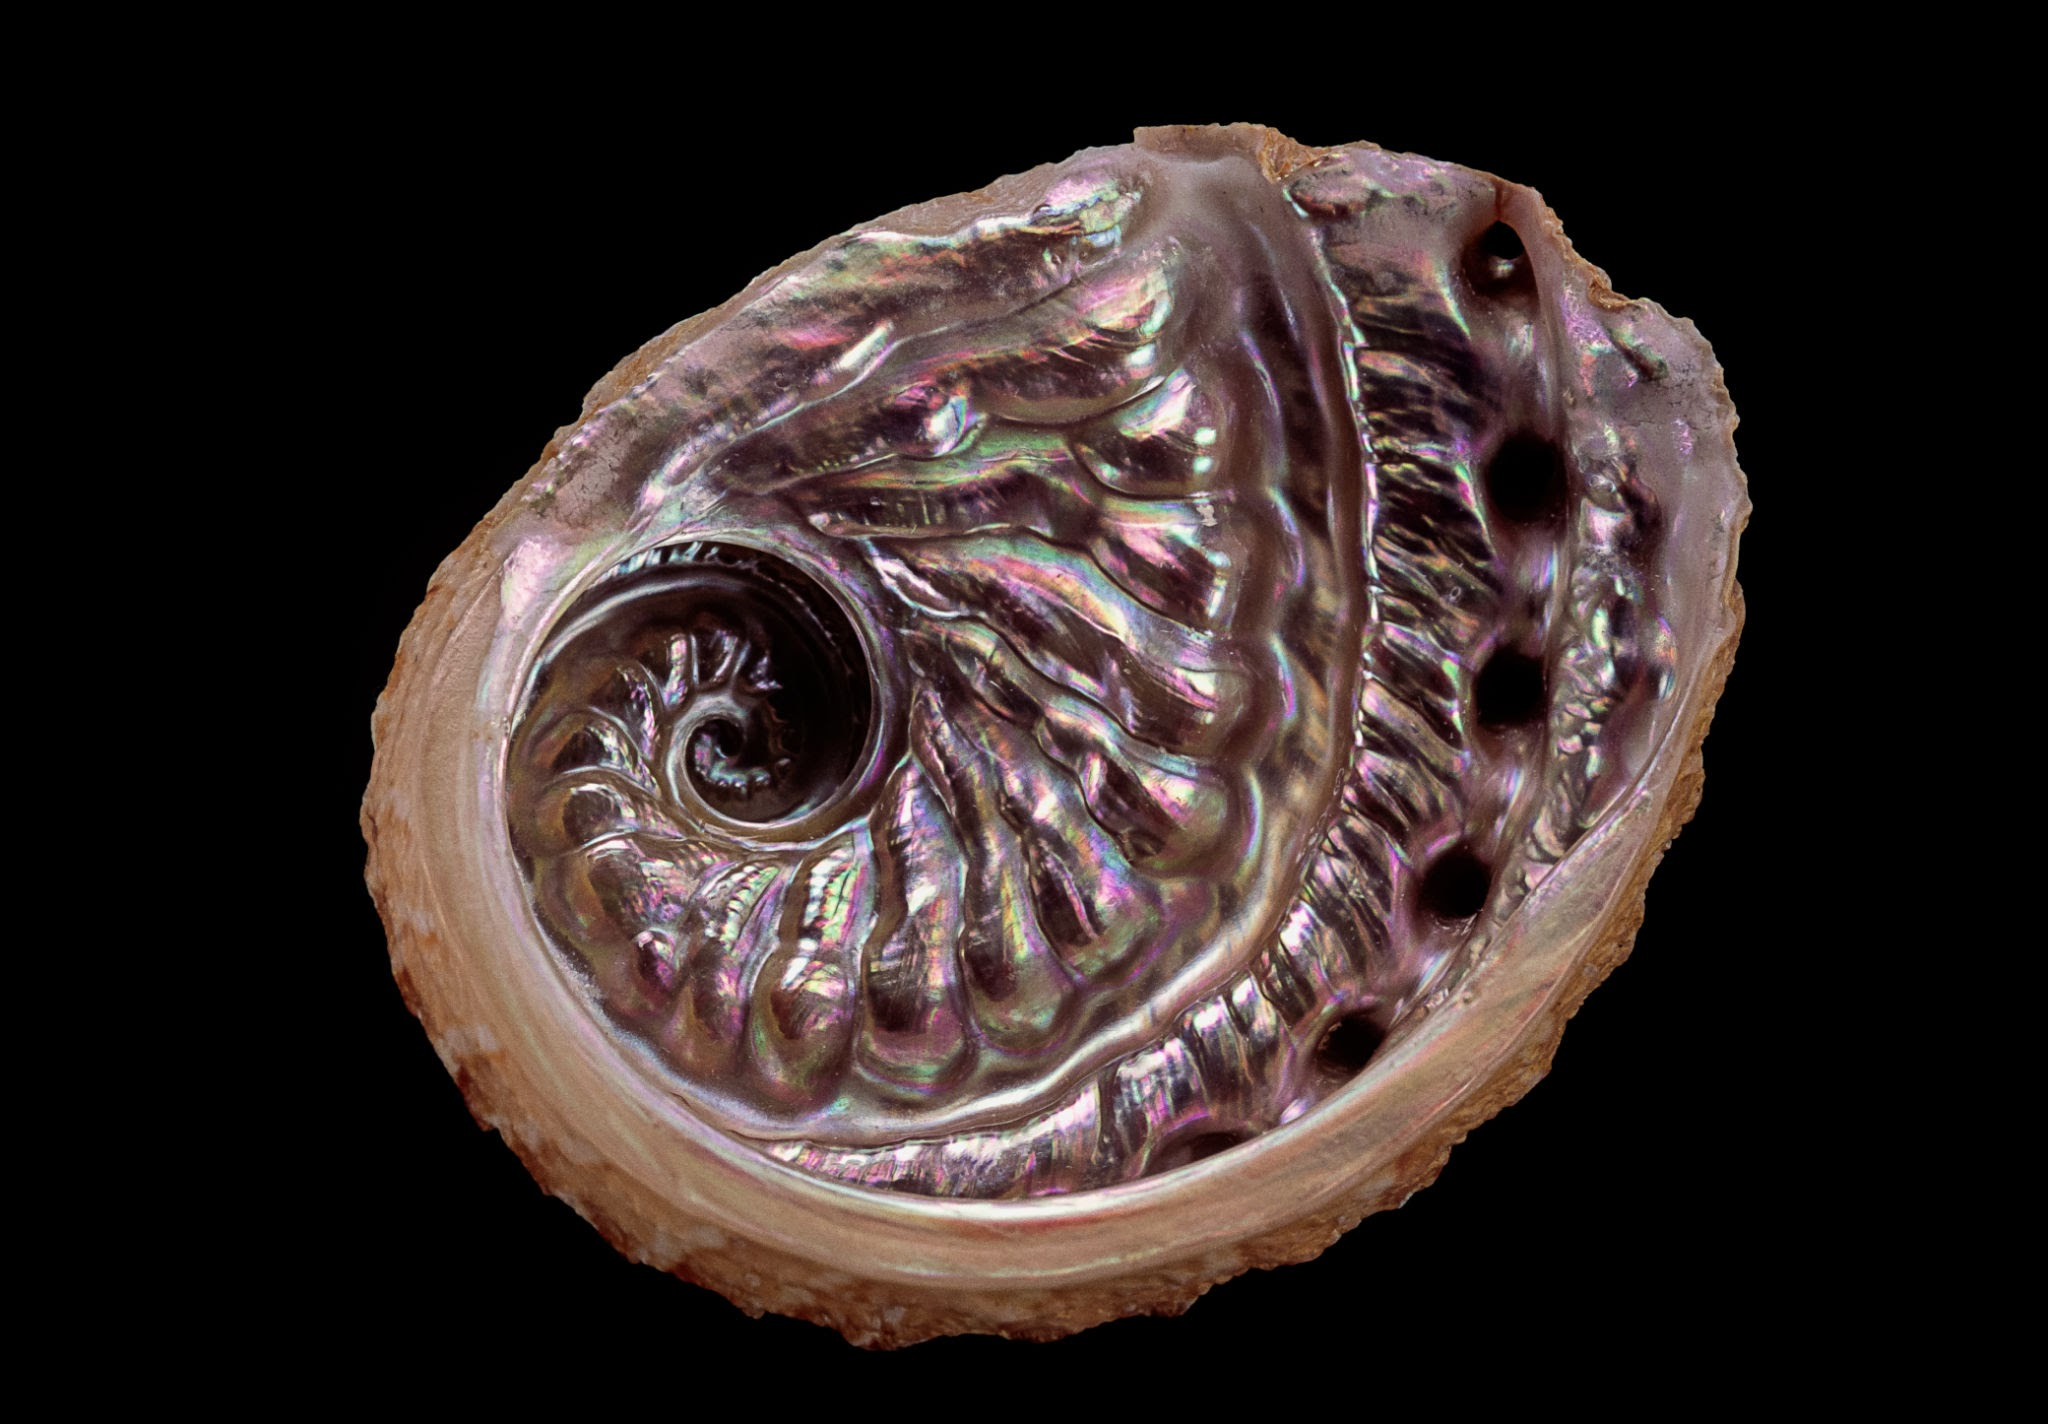

In [32]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [33]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [34]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

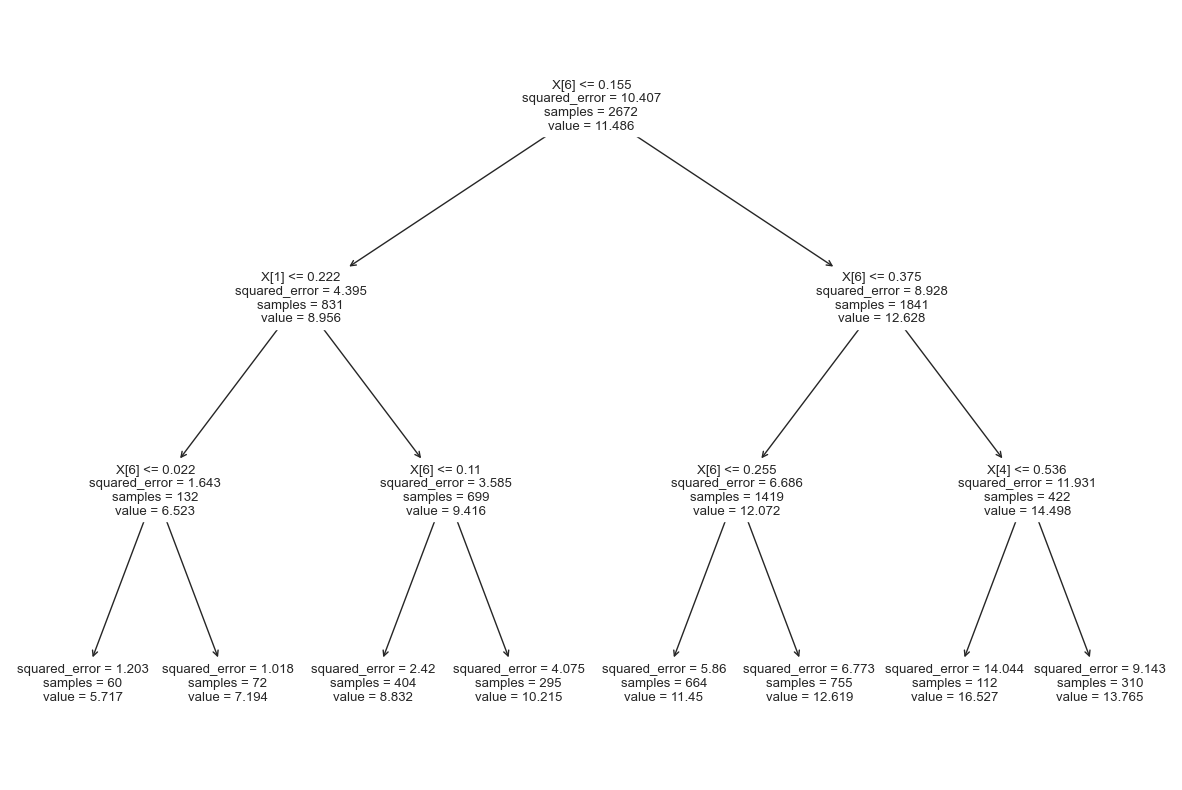

In [35]:
clf = DecisionTreeRegressor(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.savefig('tree1.png')

Посчитайте выбранную метрику на валидационной выборке.

In [36]:
y_pred_val=clf.predict(X_valid)
print(
    f' MSE -> {mean_squared_error(y_valid, y_pred_val):.5f} \n',  
    f'MAPE -> {mean_absolute_percentage_error(y_valid, y_pred_val):.5f} \n',
    f'r^2 -> {r2_score(y_valid, y_pred_val):.5f}' 
     )

 MSE -> 5.74885 
 MAPE -> 0.15526 
 r^2 -> 0.41078


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [37]:
X_train.shape

(2672, 7)

In [168]:
depths = np.arange(3, 500)
out_mse = []
out_mape = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    out_mse.append(mean_squared_error(y_valid, y_predict))
    out_mape.append(mean_absolute_percentage_error(y_valid, y_predict))
    
output_mse = np.array(out_mse)
output_mape = np.array(out_mape)

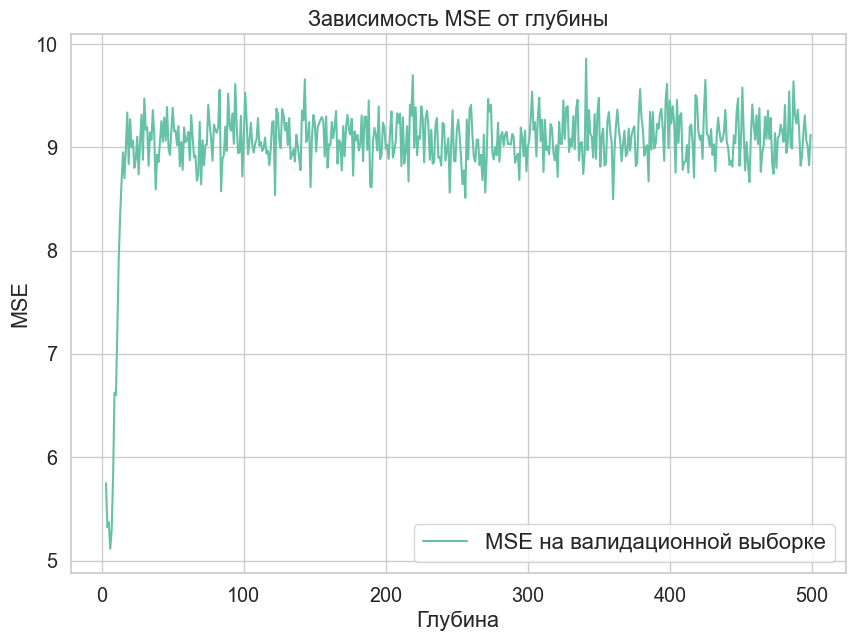

In [173]:
plt.figure(figsize=(10, 7))
plt.plot(depths, output_mse, label='MSE на валидационной выборке')
plt.title('Зависимость MSE от глубины')
plt.xlabel('Глубина')
plt.ylabel('MSE')
plt.legend(fontsize=16)

На графике виден явный локальный минимум в левой части графика (малые глубины). Рассмотрим этот участок поподробнее:

(3.0, 15.0)

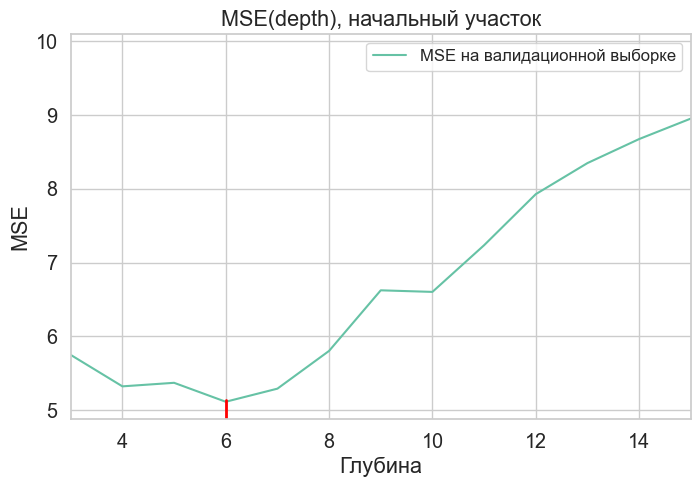

In [181]:
plt.figure(figsize=(8, 5))
plt.plot(depths, output_mse, label='MSE на валидационной выборке')
plt.title(r'MSE(depth), начальный участок')
plt.xlabel('Глубина')
plt.ylabel('MSE')
plt.legend(fontsize=12)
plt.axvline(6, 0, 0.05, color='red', lw=2)
plt.xlim(3,15)

На этом графике уже явно виден локальный минимум среднекавдратичной ошибки при глубине `max_depth=6`

Посмотрим теперь на значение и динамику изменения `MAPE`:

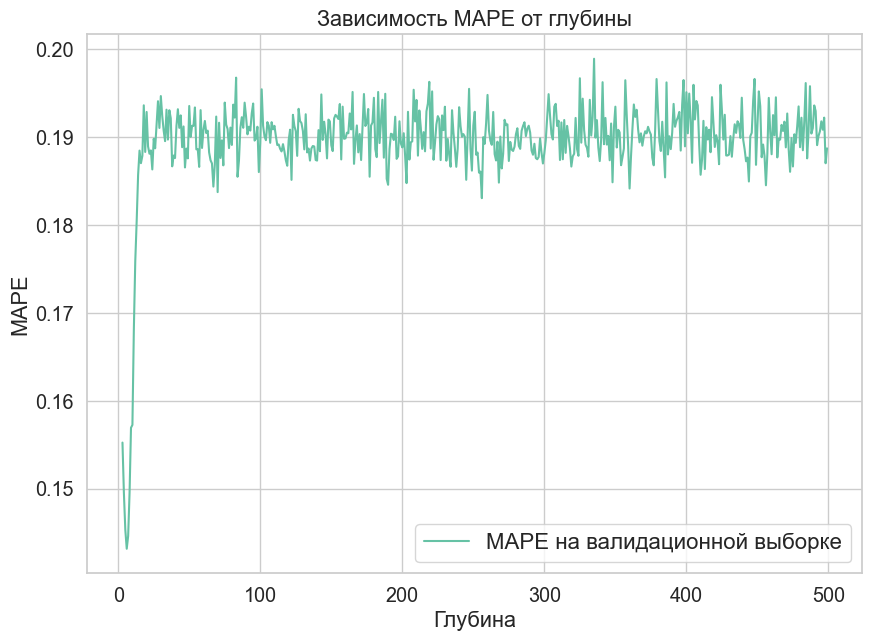

In [183]:
plt.figure(figsize=(10, 7))
plt.plot(depths, output_mape, label='MAPE на валидационной выборке')
plt.title('Зависимость MAPE от глубины')
plt.xlabel('Глубина')
plt.ylabel('MAPE')
plt.legend(fontsize=16)

(3.0, 15.0)

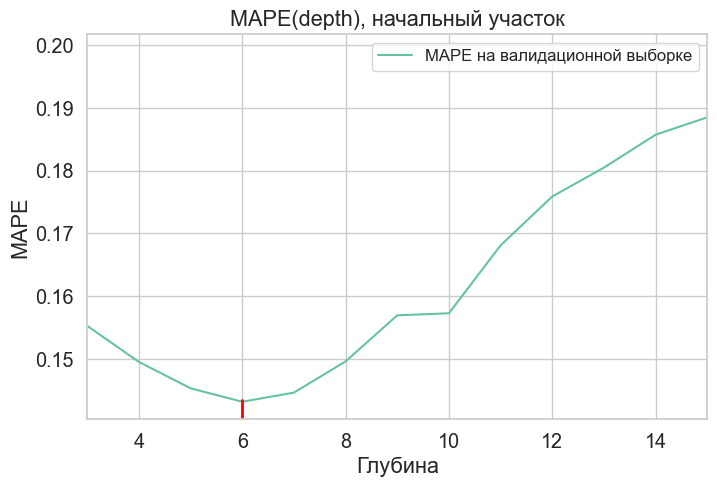

In [184]:
plt.figure(figsize=(8, 5))
plt.plot(depths, output_mape, label='MAPE на валидационной выборке')
plt.title(r'MAPE(depth), начальный участок')
plt.xlabel('Глубина')
plt.ylabel('MAPE')
plt.legend(fontsize=12)
plt.axvline(6, 0, 0.05, color='red', lw=2)
plt.xlim(3,15)

Для этой метрики также видим минимум при той же глубине `max_depth=6`, это итак ожидалось, но почему бы не показать. 

Зафиксируем это гиперпараметр и будем дальше его использовать.

In [38]:
best_depth = 6

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

In [40]:
min_samps = np.arange(3, X_train.shape[0])
out_mse = []
for mnsp in min_samps:
    model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=mnsp).fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    out_mse.append(mean_squared_error(y_valid, y_predict))
    
errors_mse = np.array(out_mse)

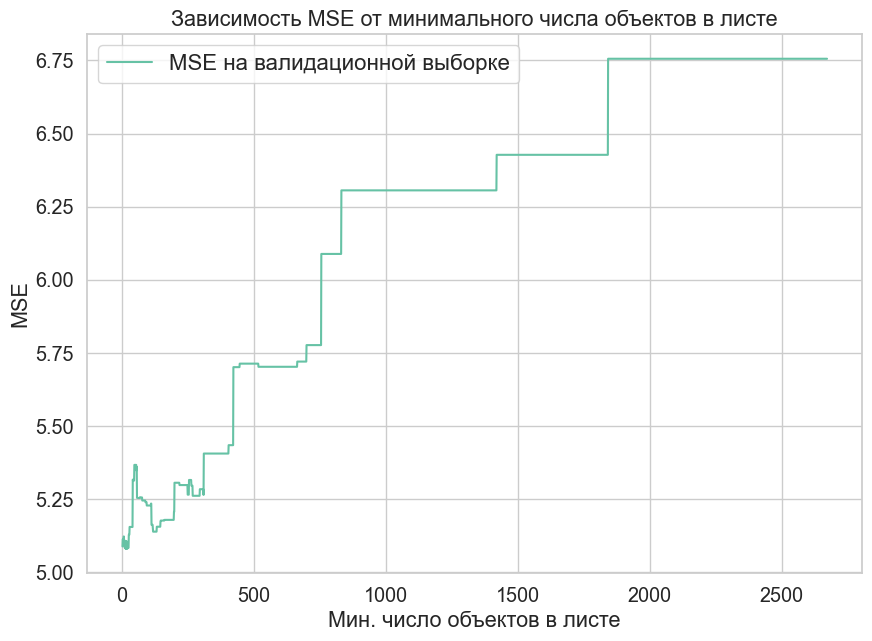

In [187]:
plt.figure(figsize=(10, 7))
plt.plot(min_samps, errors_mse, label='MSE на валидационной выборке')
plt.title('Зависимость MSE от минимального числа объектов в листе')
plt.xlabel('Мин. число объектов в листе')
plt.ylabel('MSE')
plt.legend(fontsize=16)

Подробнее рассмотрим начальный участок графика:

(5.0, 5.5)

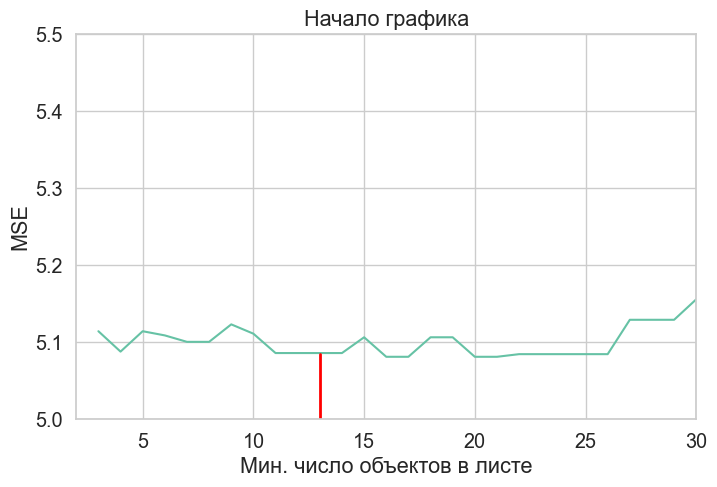

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(min_samps, errors_mse, label='MSE на валидационной выборке')
plt.title('Начало графика')
plt.xlabel('Мин. число объектов в листе')
plt.ylabel('MSE')
plt.axvline(13, 0, 0.17, color='red', lw=2)
plt.xlim(2, 30)
plt.ylim(5, 5.5)

In [41]:
np.argmin(errors_mse)

13

Опредлённое по графику, оптимальное значение гиперпараметра `min_samples_split` оказалось равно $12$. 

Зафиксируем данное зачение

In [44]:
min_samps_best=13

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [45]:
mod_best = DecisionTreeRegressor(max_depth=best_depth, 
        min_samples_split=min_samps_best, random_state=42).fit(X_train, y_train)

y_pred_test = mod_best.predict(X_test)

print(
    f' MSE -> {mean_squared_error(y_test, y_pred_test):.5f} \n',  
    f'MAPE -> {mean_absolute_percentage_error(y_test, y_pred_test):.4f} \n',
    f'r^2 -> {r2_score(y_test, y_pred_test):.5f}' 
     )

 MSE -> 5.59667 
 MAPE -> 0.1400 
 r^2 -> 0.48300


Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [59]:
params = {'max_depth': np.arange(2,50), 'min_samples_split': np.arange(2,100)}
model = DecisionTreeRegressor()
model_cv = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [60]:
model_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

In [60]:
mean_squared_error(y_test, y_pred_test)

5.596665109078264

In [61]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.13995195278751751

In [62]:
r2_score(y_test, y_pred_test)

0.48299708869159386

**Лучшая модель по мнению GridSearchCV**

In [61]:
mean_squared_error(y_test, model_cv.predict(X_test))

5.432111540264045

In [62]:
mean_absolute_percentage_error(y_test, model_cv.predict(X_test))

0.14073383047756127

In [63]:
r2_score(y_test, model_cv.predict(X_test))

0.49819804720618166

Далее используем `GraphViz` для того, чтобы построить деревья более красиво.

In [67]:
def pretty_tree(decision_tree_regressor, X):
    '''
    Функция, строящая красивые деревья
    с помощью graphviz
    '''
    tree_data = export_graphviz(
        decision_tree_regressor, 
        feature_names=X.columns, 
        filled=True, special_characters=True)  
    return graphviz.Source(tree_data)

Лучшая модель, полученная ручным подбором гиперпараметров:

In [58]:
tree1 = pretty_tree(mod_best, X_train)
tree1.render('my_tree_best', format='png', view=False)

'my_tree_best.png'

Модель, подобранная GridSearchCV:

In [70]:
tree_cv = pretty_tree(model_cv.best_estimator_, X_train)
tree_cv.render('tree_cv', format='png', view=False)

'tree_cv.png'

Выведем параметры обеих деревьев.

Для моей лучшей модели:

In [82]:
mod_best.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Для модели, построенной GridSearchCV:

In [85]:
model_cv.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 85,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Видно, что несмотря на мнимумы MSE, полученные ранее по графику при подборе параметров по отдельности, GridSearch показал лучшие результаты и подобрал другие параметры

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

In [76]:
#Данные для построения Barplot
barr = {X_train.columns[i]:[mod_best.feature_importances_[i],
                           model_cv.best_estimator_.feature_importances_[i]] for i in range(len(mod_best.feature_importances_))}
barr['model'] = ['my_model', 'cv_model']
bar_DF = pd.DataFrame(barr)
bar_data = bar_DF.melt(id_vars='model') #Позволяет выделить идентификаторы

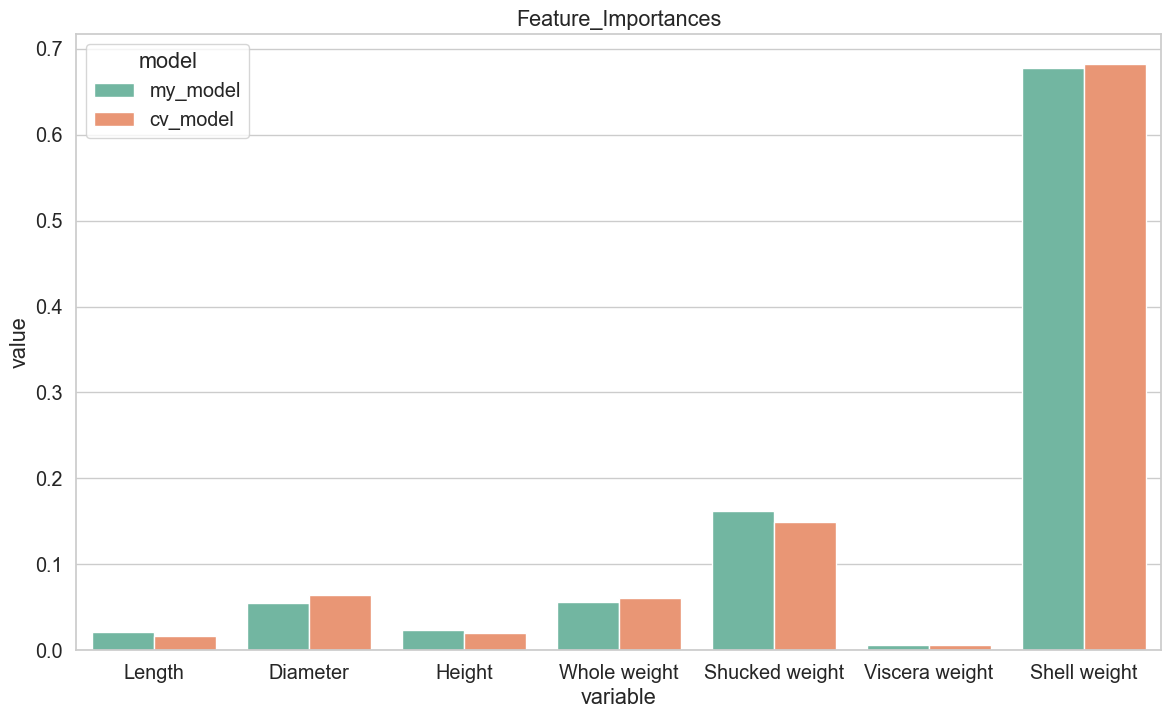

In [80]:
plt.figure(figsize=(14, 8))
plt.title('Feature_Importances')
sns.barplot(data=bar_data, x='variable', y='value', hue='model')
plt.show()

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:** 

1. Подбор оптимальных параметров модели с помошью минимизации метрик MSE, MAPE дал очень хорошие результаты, поскольку модель, подобранная GridSearchCV отличается от подобранной первым способом не сильно. Это видно из сравнения знаений R^2, MSE и MAPE, a также по построенному barplot'у с точки зрения влияния признаков.

2. Построенный `barplot` позволяет сравнить влияние признаков на итоговые результаты, то есть их вес. По графику видно, что наиболшее влияние на возраст моллюсков имеет вес раковины, что достаточно логично. У модели CV вес данного признака оказался больше, чем у моей модели с ручным подбором параметров. Поскольку данный признак имеет сильно больший вес, чем все остальные, то это правильно с точки зрения успешности предсказаний. Также логично, что сброшенный вес 'shucked weight' имеет доствточно большой вес, а весд диаметра больше чем длина или высота, т.к. зависимость массы раковины квадратична относительно диаметра, а масса раковины имеет наибольшую из всех признаков связь с возрастом


## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [87]:
forest_mod = RandomForestRegressor(n_estimators=500).fit(X_train, y_train)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посчитаем ошибки предсказаний для обучающей и валидационной выборок с помощью префиксных сумм:

In [93]:
train_preds = np.array([i.predict(X_train.values) for i in forest_mod.estimators_])
train_ests = np.cumsum(train_preds, axis=0)/np.arange(1,501).reshape(-1,1)

valid_preds = np.array([i.predict(X_valid.values) for i in forest_mod.estimators_])
valid_ests = np.cumsum(valid_preds, axis=0)/np.arange(1,501).reshape(-1,1)

Метрика на тренировочной выборке:

In [96]:
train_preds.shape

(500, 2672)

In [95]:
y_train.shape

(2672,)

In [102]:
metr_train = []
for i in range(train_ests.shape[0]):
    metr_train.append(mean_squared_error(y_train, train_ests[i]))
metr_train = np.array(metr_train)

На валидационной выборке:

In [103]:
metr_val = []
for i in range(train_ests.shape[0]):
    metr_val.append(mean_squared_error(y_valid, valid_ests[i]))
metr_val = np.array(metr_train)

График:

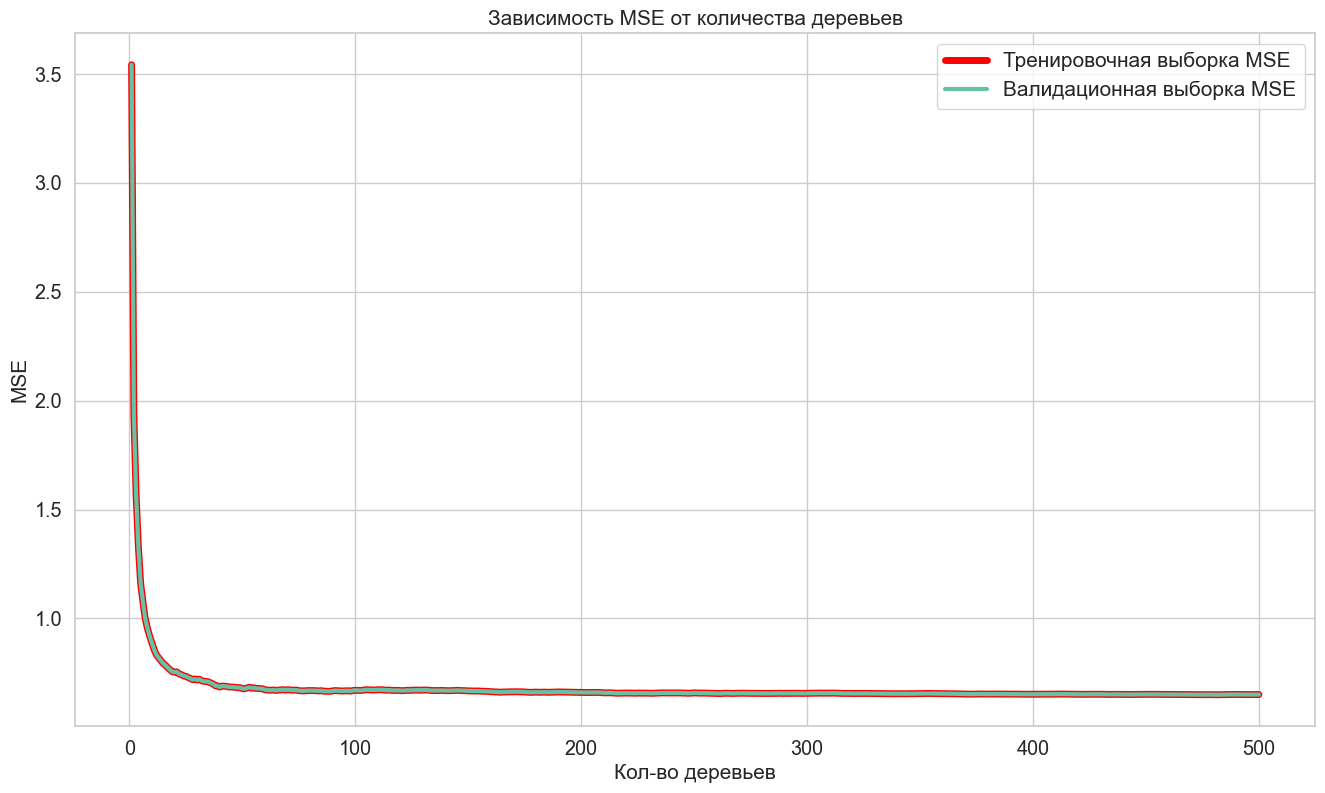

In [111]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1,501), metr_train, label="Тренировочная выборка MSE", color='red', lw=5)
plt.plot(np.arange(1,501), metr_val, label="Валидационная выборка MSE", lw=3)
plt.title("Зависимость MSE от количества деревьев", fontsize=15)
plt.xlabel("Кол-во деревьев", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.legend(fontsize=15)

Графики почти совпадают...

Посчитайте метрику на тестовой выборке.

In [ ]:
<...>

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

In [ ]:
<...>

Сделайте выводы.

**Вывод:** <...>